In [9]:
import pandas as pd
import numpy as np
import logging
import os
import matplotlib.pyplot as plt # <--- AÑADIR ESTA LÍNEA
import seaborn as sns           # <--- AÑADIR ESTA LÍNEA


# Configuración de logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_merge.log"), # Log específico para el merge
        logging.StreamHandler()
    ]
)

logging.info("Inicio del notebook de unificación de datasets (001_merge.ipynb).")

# Opciones de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) # Podrías querer más para verificar el merge
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-05-22 16:18:46,570 - INFO - Inicio del notebook de unificación de datasets (001_merge.ipynb).


In [10]:
# --- Definición de Rutas a los Archivos Limpios ---
base_path_processed = "/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/"
file_paths_cleaned = {
    2015: os.path.join(base_path_processed, "2015_cleaned.csv"),
    2016: os.path.join(base_path_processed, "2016_cleaned.csv"),
    2017: os.path.join(base_path_processed, "2017_cleaned.csv"),
    2018: os.path.join(base_path_processed, "2018_cleaned.csv"),
    2019: os.path.join(base_path_processed, "2019_cleaned.csv")
}

logging.info(f"Rutas a los archivos limpios definidas: {file_paths_cleaned}")

# --- Carga de los DataFrames Limpios ---
dataframes_cleaned = {} # Diccionario para almacenar los DataFrames cargados
all_loaded_successfully = True

for year, path in file_paths_cleaned.items():
    try:
        logging.info(f"Intentando cargar el archivo limpio: {path}")
        df = pd.read_csv(path)
        dataframes_cleaned[year] = df
        logging.info(f"Archivo {os.path.basename(path)} ({year}) cargado exitosamente. Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
        
        # Verificación con head(1)
        print(f"\nPrimeras fila del DataFrame {year} (Markdown):")
        print(df.head(1).to_markdown(index=False))
        
    except FileNotFoundError:
        logging.error(f"Error: El archivo limpio {path} no fue encontrado.")
        all_loaded_successfully = False
        break # Detener si un archivo no se encuentra
    except Exception as e:
        logging.error(f"Ocurrió un error al cargar {path}: {e}")
        all_loaded_successfully = False
        break

if not all_loaded_successfully:
    logging.error("No todos los DataFrames limpios pudieron ser cargados. Revisar logs.")
    print("\nError: No todos los DataFrames limpios pudieron ser cargados. Proceso detenido.")
else:
    logging.info("Todos los DataFrames limpios fueron cargados exitosamente.")
    # Mostrar un pequeño resumen de los DFs cargados
    for year, df_loaded in dataframes_cleaned.items():
        print(f"Resumen df_{year}_clean: {len(df_loaded)} filas, {df_loaded.columns.tolist()}")

2025-05-22 16:18:46,586 - INFO - Rutas a los archivos limpios definidas: {2015: '/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2015_cleaned.csv', 2016: '/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2016_cleaned.csv', 2017: '/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2017_cleaned.csv', 2018: '/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2018_cleaned.csv', 2019: '/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2019_cleaned.csv'}
2025-05-22 16:18:46,587 - INFO - Intentando cargar el archivo limpio: /home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2015_cleaned.csv
2025-05-22 16:18:46,590 - INFO - Archivo 2015_cleaned.csv (2015) cargado exitosamente. Filas: 158, Columnas: 11
2025-05-22 16:18:46,592 - INFO - Intentando cargar el archivo limpio: /home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/2016_cleaned.csv
2025-05-22 16:18:46,596 - INFO - Archivo 2016_cleaned.c


Primeras fila del DataFrame 2015 (Markdown):
|   year | region         | country     |   happiness_rank |   happiness_score |   social_support |   health_life_expectancy |   generosity |   freedom_to_make_life_choices |   economy_gdp_per_capita |   perceptions_of_corruption |
|-------:|:---------------|:------------|-----------------:|------------------:|-----------------:|-------------------------:|-------------:|-------------------------------:|-------------------------:|----------------------------:|
|   2015 | Western Europe | Switzerland |                1 |             7.587 |          1.34951 |                  0.94143 |      0.29678 |                        0.66557 |                  1.39651 |                     0.41978 |

Primeras fila del DataFrame 2016 (Markdown):
|   year | region         | country   |   happiness_rank |   happiness_score |   social_support |   health_life_expectancy |   generosity |   freedom_to_make_life_choices |   economy_gdp_per_capita |   perception

In [11]:
# --- Análisis de Presencia de Países por Año ---
if all_loaded_successfully and dataframes_cleaned:
    logging.info("Analizando la presencia de países a través de los años.")
    
    all_countries_by_year = {}
    all_countries_set = set() # Para obtener todos los países únicos alguna vez listados
    
    for year, df in dataframes_cleaned.items():
        countries_in_year = set(df['country'].unique())
        all_countries_by_year[year] = countries_in_year
        all_countries_set.update(countries_in_year)
        logging.info(f"Año {year}: {len(countries_in_year)} países únicos.")

    print(f"\nTotal de países únicos alguna vez listados en todos los datasets: {len(all_countries_set)}")

    # Encontrar países presentes en TODOS los años (intersección)
    if all_countries_by_year:
        common_countries = set.intersection(*all_countries_by_year.values())
        logging.info(f"Número de países presentes en TODOS los años: {len(common_countries)}")
        print(f"\nNúmero de países presentes en TODOS los años: {len(common_countries)}")
        if len(common_countries) < 20: # Mostrar solo si la lista no es demasiado larga
            print(f"Países comunes: {sorted(list(common_countries))}")

    # Encontrar países que NO están en todos los años
    countries_not_in_all_years = all_countries_set - common_countries
    logging.info(f"Número de países que NO están presentes en todos los años: {len(countries_not_in_all_years)}")
    print(f"\nNúmero de países que NO están presentes en todos los años: {len(countries_not_in_all_years)}")
    if len(countries_not_in_all_years) < 30 and len(countries_not_in_all_years) > 0: # Mostrar si la lista no es demasiado larga
        print(f"Países no presentes en todos los años: {sorted(list(countries_not_in_all_years))}")
    
    # Opcional: Crear una matriz de presencia país-año
    country_presence_df = pd.DataFrame(index=sorted(list(all_countries_set)))
    for year, countries_in_year_set in all_countries_by_year.items():
        country_presence_df[year] = country_presence_df.index.isin(countries_in_year_set)
    
    print("\nMatriz de Presencia de Países por Año (True si está presente):")
    # Para una mejor visualización, podrías querer solo mostrar un fragmento o resumir
    if len(country_presence_df) > 20:
        print(country_presence_df.sample(10).to_markdown()) # Muestra 10 filas aleatorias
    else:
        print(country_presence_df.to_markdown())
    
    # Contar en cuántos años aparece cada país
    country_appearance_counts = country_presence_df.sum(axis=1).sort_values()
    print("\nConteo de años en los que aparece cada país:")
    print(country_appearance_counts.head(30).to_markdown())
    
else:
    logging.warning("No se puede realizar el análisis de presencia de países; DataFrames no cargados.")

2025-05-22 16:18:46,621 - INFO - Analizando la presencia de países a través de los años.
2025-05-22 16:18:46,622 - INFO - Año 2015: 158 países únicos.
2025-05-22 16:18:46,623 - INFO - Año 2016: 157 países únicos.
2025-05-22 16:18:46,625 - INFO - Año 2017: 155 países únicos.
2025-05-22 16:18:46,626 - INFO - Año 2018: 156 países únicos.
2025-05-22 16:18:46,627 - INFO - Año 2019: 156 países únicos.
2025-05-22 16:18:46,627 - INFO - Número de países presentes en TODOS los años: 141
2025-05-22 16:18:46,628 - INFO - Número de países que NO están presentes en todos los años: 29



Total de países únicos alguna vez listados en todos los datasets: 170

Número de países presentes en TODOS los años: 141

Número de países que NO están presentes en todos los años: 29
Países no presentes en todos los años: ['Angola', 'Belize', 'Central African Republic', 'Comoros', 'Djibouti', 'Gambia', 'Hong Kong', 'Hong Kong S.A.R., China', 'Laos', 'Lesotho', 'Macedonia', 'Mozambique', 'Namibia', 'North Cyprus', 'North Macedonia', 'Northern Cyprus', 'Oman', 'Puerto Rico', 'Somalia', 'Somaliland Region', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname', 'Swaziland', 'Taiwan', 'Taiwan Province of China', 'Trinidad & Tobago', 'Trinidad and Tobago']

Matriz de Presencia de Países por Año (True si está presente):
|              |   2015 |   2016 |   2017 |   2018 |   2019 |
|:-------------|-------:|-------:|-------:|-------:|-------:|
| Mauritius    |      1 |      1 |      1 |      1 |      1 |
| Tajikistan   |      1 |      1 |      1 |      1 |      1 |
| Rwanda       |      1 

In [12]:
# --- Verificación de Consistencia de Columnas (Opcional pero Recomendado) ---
if all_loaded_successfully and dataframes_cleaned:
    logging.info("Verificando consistencia de columnas entre los DataFrames cargados.")
    
    # Tomar las columnas del primer DataFrame como referencia
    reference_columns = None
    reference_year = None
    
    all_columns_match = True
    column_issues = []

    for year, df in dataframes_cleaned.items():
        if reference_columns is None:
            reference_columns = sorted(df.columns.tolist()) # Comparamos conjuntos ordenados
            reference_year = year
        else:
            current_columns = sorted(df.columns.tolist())
            if current_columns != reference_columns:
                all_columns_match = False
                issue = (f"Discrepancia de columnas en el año {year}. "
                         f"Esperado (basado en {reference_year}): {reference_columns}. "
                         f"Encontrado: {current_columns}. "
                         f"Diferencias: Set A-B: {set(reference_columns) - set(current_columns)}, "
                         f"Set B-A: {set(current_columns) - set(reference_columns)}")
                column_issues.append(issue)
                logging.error(issue)

    if all_columns_match:
        logging.info("Todas las columnas coinciden en los DataFrames limpios.")
        print("\nVerificación de columnas: Todas las columnas coinciden en los DataFrames limpios.")
    else:
        logging.error("Discrepancia en las columnas entre los DataFrames limpios. Revisar los logs detallados.")
        print("\nError en la verificación de columnas: No todas las columnas coinciden. Detalles:")
        for issue_detail in column_issues:
            print(f"- {issue_detail}")
        # Aquí podrías decidir detener el proceso o intentar una concatenación más permisiva,
        # pero es mejor arreglar las discrepancias en los notebooks de limpieza.
        all_loaded_successfully = False # Para detener la concatenación si hay problemas graves

else:
    if not dataframes_cleaned:
        logging.warning("No hay DataFrames cargados para verificar columnas.")
    # El error de carga ya se habrá logueado.

2025-05-22 16:18:46,665 - INFO - Verificando consistencia de columnas entre los DataFrames cargados.
2025-05-22 16:18:46,667 - INFO - Todas las columnas coinciden en los DataFrames limpios.



Verificación de columnas: Todas las columnas coinciden en los DataFrames limpios.


In [13]:
# --- Concatenación de los DataFrames ---
df_unified = None

if all_loaded_successfully and dataframes_cleaned:
    logging.info("Iniciando concatenación de los DataFrames limpios.")
    
    # Convertir el diccionario de DataFrames a una lista para pd.concat
    list_of_dfs_to_concat = [dataframes_cleaned[year] for year in sorted(dataframes_cleaned.keys())] # Ordenar por año
    
    try:
        df_unified = pd.concat(list_of_dfs_to_concat, ignore_index=True)
        logging.info("DataFrames concatenados exitosamente en df_unified.")
        logging.info(f"El DataFrame unificado tiene {df_unified.shape[0]} filas y {df_unified.shape[1]} columnas.")
        
        print("\nDataFrame Unificado (primeras 5 filas):")
        print(df_unified.head(2).to_markdown(index=False))
        print("\nDataFrame Unificado (últimas 5 filas):")
        print(df_unified.tail(2).to_markdown(index=False))
        print(f"\nDimensiones del DataFrame Unificado: {df_unified.shape}")
        
    except Exception as e:
        logging.error(f"Error durante la concatenación de DataFrames: {e}")
        print(f"\nError durante la concatenación: {e}")
        df_unified = None
else:
    logging.warning("No se procederá con la concatenación debido a errores previos en la carga o verificación de columnas.")
    print("\nNo se puede continuar con la concatenación.")

2025-05-22 16:18:46,720 - INFO - Iniciando concatenación de los DataFrames limpios.
2025-05-22 16:18:46,723 - INFO - DataFrames concatenados exitosamente en df_unified.
2025-05-22 16:18:46,723 - INFO - El DataFrame unificado tiene 782 filas y 11 columnas.



DataFrame Unificado (primeras 5 filas):
|   year | region         | country     |   happiness_rank |   happiness_score |   social_support |   health_life_expectancy |   generosity |   freedom_to_make_life_choices |   economy_gdp_per_capita |   perceptions_of_corruption |
|-------:|:---------------|:------------|-----------------:|------------------:|-----------------:|-------------------------:|-------------:|-------------------------------:|-------------------------:|----------------------------:|
|   2015 | Western Europe | Switzerland |                1 |             7.587 |          1.34951 |                  0.94143 |      0.29678 |                        0.66557 |                  1.39651 |                     0.41978 |
|   2015 | Western Europe | Iceland     |                2 |             7.561 |          1.40223 |                  0.94784 |      0.4363  |                        0.62877 |                  1.30232 |                     0.14145 |

DataFrame Unificado (últimas 5

In [14]:
# --- Verificación Final del DataFrame Unificado ---
if df_unified is not None:
    logging.info("Realizando verificación final del DataFrame unificado.")
    
    print("\nInformación del DataFrame Unificado:")
    df_unified.info()
    
    print("\nConteo de valores nulos en el DataFrame Unificado:")
    null_unified_counts = df_unified.isnull().sum()
    print(null_unified_counts[null_unified_counts > 0].to_markdown() if null_unified_counts.sum() > 0 else "No hay valores nulos explícitos (NaN) en el DataFrame unificado.")

    print("\nValores únicos por año en el DataFrame Unificado:")
    if 'year' in df_unified.columns:
        print(df_unified['year'].value_counts().sort_index().to_markdown())
    
    # Podrías añadir más verificaciones aquí, como un describe()
    print("\nEstadísticas descriptivas del DataFrame Unificado:")
    print(df_unified.describe(include='all').to_markdown()) # include='all' para numéricas y categóricas
    
else:
    logging.error("El DataFrame unificado (df_unified) no está disponible para verificación.")
    print("\nEl DataFrame unificado no está disponible.")

2025-05-22 16:18:46,738 - INFO - Realizando verificación final del DataFrame unificado.



Información del DataFrame Unificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          782 non-null    int64  
 1   region                        782 non-null    object 
 2   country                       782 non-null    object 
 3   happiness_rank                782 non-null    int64  
 4   happiness_score               782 non-null    float64
 5   social_support                782 non-null    float64
 6   health_life_expectancy        782 non-null    float64
 7   generosity                    782 non-null    float64
 8   freedom_to_make_life_choices  782 non-null    float64
 9   economy_gdp_per_capita        782 non-null    float64
 10  perceptions_of_corruption     782 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB

Conteo de valores nulos en

In [15]:
# --- Guardar el DataFrame Unificado ---
if df_unified is not None:
    output_path_unified = os.path.join(base_path_processed, "happiness_unified_dataset.csv") # O .parquet para eficiencia
    try:
        df_unified.to_csv(output_path_unified, index=False)
        logging.info(f"DataFrame unificado guardado exitosamente en: {output_path_unified}")
        print(f"\nDataFrame unificado guardado en: {output_path_unified}")
    except Exception as e:
        logging.error(f"Error al guardar el DataFrame unificado: {e}")
        print(f"\nError al guardar el DataFrame unificado: {e}")
else:
    logging.error("El DataFrame unificado (df_unified) no está disponible para ser guardado.")
    print("\nEl DataFrame unificado no se puede guardar.")

2025-05-22 16:18:46,770 - INFO - DataFrame unificado guardado exitosamente en: /home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/happiness_unified_dataset.csv



DataFrame unificado guardado en: /home/nicolas/Escritorio/workshops_ETL/workshop_3/data/processed/happiness_unified_dataset.csv


2025-05-22 16:18:46,779 - INFO - Generando Gráfico Lineal: Happiness Score Promedio por Año del dataset unificado completo.


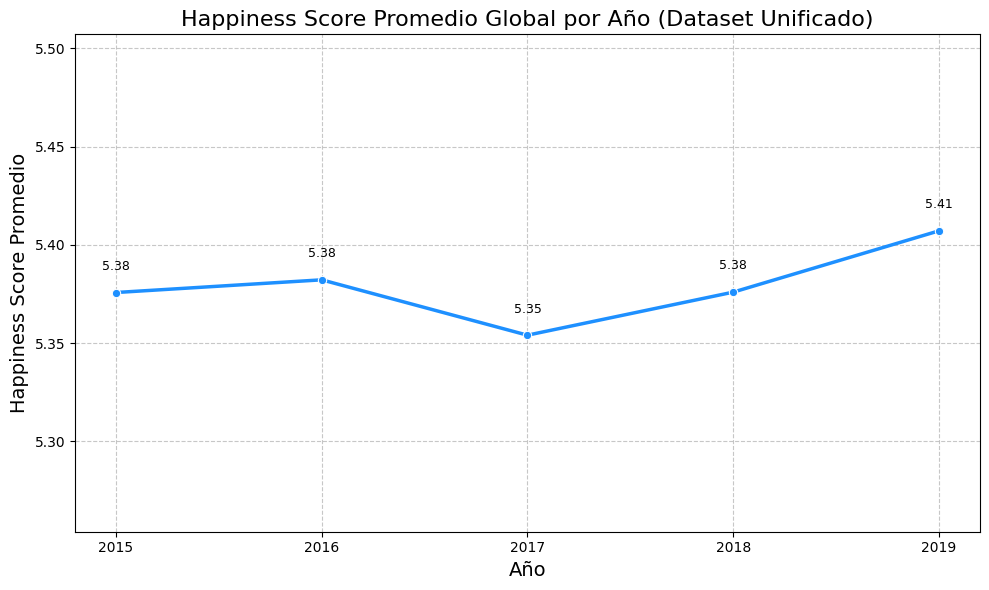

2025-05-22 16:18:46,916 - INFO - Gráfico Lineal del Happiness Score Promedio por Año (Dataset Unificado) mostrado.


In [16]:
# Celda 8: Gráfico de Línea - Happiness Score Promedio por Año (del Dataset Unificado Completo)

if 'df_unified' in locals() and df_unified is not None and not df_unified.empty:
    logging.info("Generando Gráfico Lineal: Happiness Score Promedio por Año del dataset unificado completo.")
    
    # Calcular el promedio de 'happiness_score' por 'year'
    avg_happiness_by_year_unified = df_unified.groupby('year')['happiness_score'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='year', y='happiness_score', data=avg_happiness_by_year_unified, marker='o', color='dodgerblue', linewidth=2.5)
    
    plt.title('Happiness Score Promedio Global por Año (Dataset Unificado)', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Happiness Score Promedio', fontsize=14)
    plt.xticks(avg_happiness_by_year_unified['year'].unique()) # Asegurar que todos los años se muestren
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(bottom=min(avg_happiness_by_year_unified['happiness_score']) - 0.1, 
             top=max(avg_happiness_by_year_unified['happiness_score']) + 0.1) # Ajustar límites del eje Y
    
    # Añadir etiquetas de valor a los puntos (opcional)
    for index, row in avg_happiness_by_year_unified.iterrows():
        plt.text(row['year'], row['happiness_score'] + 0.01, f"{row['happiness_score']:.2f}", 
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
    logging.info("Gráfico Lineal del Happiness Score Promedio por Año (Dataset Unificado) mostrado.")
else:
    logging.warning("El DataFrame 'df_unified' no está disponible o está vacío. No se puede generar el gráfico.")